In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline

In [28]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [29]:
init_notebook_mode(connected=True)
cf.go_offline()


In [30]:
df=pd.read_csv('CONTAINER.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6839 entries, 0 to 6838
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             6839 non-null   int64  
 1   ATB DATE               6839 non-null   object 
 2   ATUB DATE              6839 non-null   object 
 3   ATA DATE               6839 non-null   object 
 4   ATD DATE               6839 non-null   object 
 5   Month                  6839 non-null   object 
 6   HY                     6839 non-null   object 
 7   Financial
Year         6839 non-null   object 
 8   Port Name              6839 non-null   object 
 9   BU_CD                  6839 non-null   object 
 10  Terminal               5722 non-null   object 
 11  VCN                    6839 non-null   int64  
 12  Berth No               6839 non-null   object 
 13  CARGO GROUP            6839 non-null   object 
 14  Commodity Type         6839 non-null   object 
 15  Comm

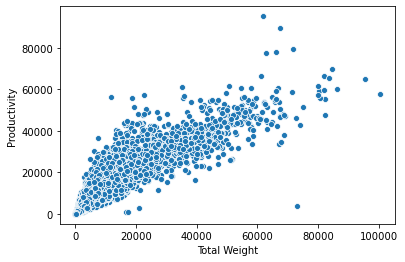

In [32]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [33]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,6839.000000,6839.000000,6839.000000,6839.000000,6839.000000,6839.000000,6839.000000,6839.000000,6839.000000,6839.000000,6839.000000,113.000000
mean,5020.313935,194115.253838,4.726134,5.837336,10273.342623,0.102531,0.010253,0.703654,0.003989,0.604139,12550.278210,21398.061062
std,2129.167610,3714.007468,10.480068,16.184168,12522.154125,0.125416,0.012542,0.857682,0.176082,4.413266,12136.679023,17763.393189
min,525.000000,190154.000000,0.000000,0.000000,14.600000,0.000000,0.000000,0.001000,0.000000,0.000000,9.670000,1.000000
25%,3234.500000,191586.500000,0.000000,0.000000,1606.000000,0.020000,0.002000,0.110000,0.000000,0.000000,2464.685000,10860.000000
50%,5026.000000,192382.000000,0.000000,0.000000,6117.400000,0.060000,0.006000,0.419000,0.000000,0.000000,9415.570000,12311.000000
75%,6853.500000,200010.000000,6.385000,7.940000,13680.200000,0.140000,0.014000,0.937000,0.000000,0.000000,19259.045000,30252.000000
max,8608.000000,200879.000000,449.200000,941.950000,100316.600000,1.000000,0.100000,6.871000,10.380000,128.030000,95124.620000,68228.000000


In [34]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [35]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [36]:
print(lm.intercept_)

3760.437407168509


In [37]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.862171


In [38]:
predictions = lm.predict(X_test)

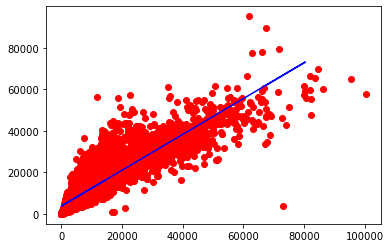

In [46]:
plt.scatter(X,y,color='red')
plt.plot(X_test,predictions,color='blue')

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main

MAE: 3820.042833523377
MSE: 26216899.179448843
RMSE: 5120.244054676383


In [40]:
joblib.dump(lm,"Container.pkl")#only execute if rmse is less than half of mean of productivity

['Container.pkl']

In [47]:
# print(explained_variance_score(y_test, predictions))
# print(max_error(y_test, predictions))
# print(mean_absolute_error(y_test, predictions))
# print(sqrt(mean_squared_error(y_test, predictions)))
print(r2_score(y_test, predictions))

0.813978329984547


In [24]:
# def gradient_descent(x,y):
#     m_curr = b_curr = 0
#     iterations = 50
#     n = len(x)
#     learning_rate = 0.00000001

#     for i in range(iterations):
#         y_predicted = m_curr * x + b_curr
#         cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
#         md = -(2/n)*sum(x*(y-y_predicted))
#         bd = -(2/n)*sum(y-y_predicted)
#         m_curr = m_curr - learning_rate * md
#         b_curr = b_curr - learning_rate * bd
#         print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

# x = np.array([12512.2,12030.4,219.0,3591.6,3956.6])#productivities
# y = np.array([8555.35,16312.41,296.95,3668.02,4040.78])#weights

# gradient_descent(x,y)